# Naive Bayes: Predicting survival from titanic crash

In [5]:
import pandas as pd

# Correct File Path
file_path = r"C:\Users\CHARUSAT\Documents\Business forecasting\20 feb 25\titanic.csv"


## Binary classification (Survived 1 vs. Not Survived 0)

In [8]:
# Read the CSV file
df = pd.read_csv(file_path)

# Display the first 5 rows
print(df.head())

   PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


### Dropping Unnecessary Columns

In [11]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


### Splitting Data into Features and Target

In [13]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

### Handling Missing Values

In [ ]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

# This code is used to convert categorical data into numerical form using one-hot encoding in Pandas.

In [15]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [17]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False


# I am dropping male column as well because of dummy variable trap theory. One column is enough to repressent male vs female

In [19]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True


In [21]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [23]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [25]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,False
1,1,38.0,71.2833,True
2,3,26.0,7.9250,True
3,1,35.0,53.1000,True
4,3,35.0,8.0500,False


In [ ]:
# This represents an instance of the Naïve Bayes classifier from Scikit-Learn, 
#specifically the Gaussian Naïve Bayes (GaussianNB) model.

## What is Gaussian Naïve Bayes?
Gaussian Naïve Bayes (GaussianNB) is a classification algorithm based on Bayes' Theorem.
It assumes that features follow a normal (Gaussian) distribution.
This is useful when dealing with continuous numerical features, such as height, weight, or age

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [33]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [37]:
model.fit(X_train,y_train)

GaussianNB()

In [39]:
model.score(X_test,y_test)

0.7574626865671642

In [41]:
X_test[0:10]

,Pclass,Age,Fare,female
205,3,2.000000,10.4625,True
721,3,17.000000,7.0542,False
602,1,29.699118,42.4000,False
76,3,29.699118,7.8958,False
438,1,64.000000,263.0000,False
791,2,16.000000,26.0000,False
273,1,37.000000,29.7000,False
164,3,1.000000,39.6875,False
695,2,52.000000,13.5000,False
243,3,22.000000,7.1250,False


In [43]:
y_test[0:10]

205    0
721    0
602    0
76     0
438    0
791    0
273    0
164    0
695    0
243    0
Name: Survived, dtype: int64

In [45]:
model.predict(X_test[0:10])

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
model.predict_proba(X_test[:10])

array([[2.67514897e-01, 7.32485103e-01],
       [9.64480873e-01, 3.55191272e-02],
       [6.94949308e-01, 3.05050692e-01],
       [9.70528331e-01, 2.94716693e-02],
       [4.59195592e-11, 1.00000000e+00],
       [9.08718711e-01, 9.12812889e-02],
       [7.44327663e-01, 2.55672337e-01],
       [9.26549970e-01, 7.34500303e-02],
       [9.19206429e-01, 8.07935708e-02],
       [9.67687639e-01, 3.23123613e-02]])

## Calculate the score using cross validation

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.776     , 0.824     , 0.792     , 0.73387097, 0.74193548])

In [ ]:
Questions for you
Q1: Handle Missing Values	
Q2: Convert Categorical Data	
Q3: Train & Evaluate Model	

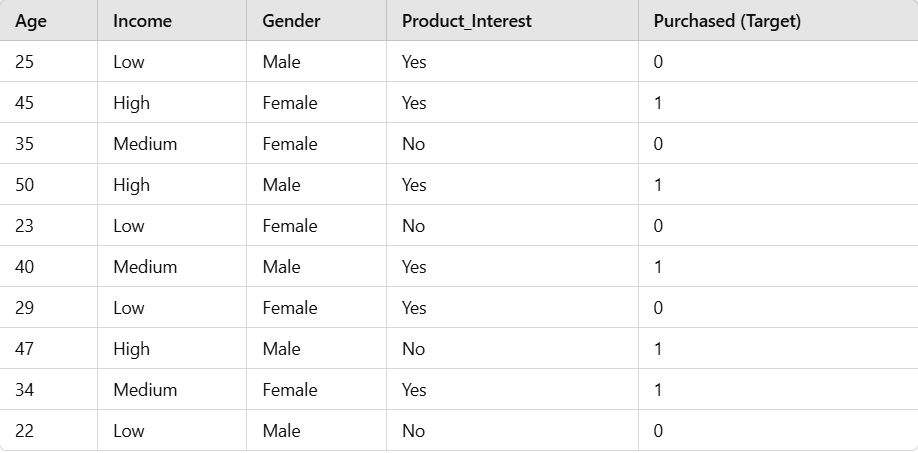